<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/02_simple_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255.

from keras.models import Sequential
from keras.layers import Dense

neural_network = Sequential()
neural_network.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
neural_network.add(Dense(units=10, activation='softmax'))
neural_network.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

history = neural_network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2548 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1037 - acc: 0.9688
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0682 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0492 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0379 - acc: 0.9886


In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc = history.history['acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

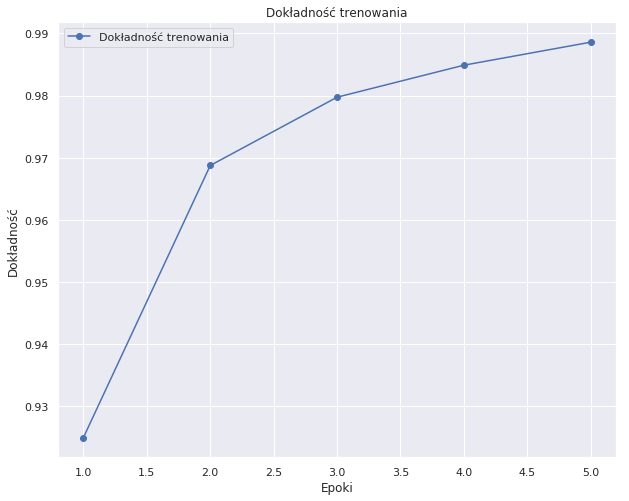

In [23]:
make_accuracy_plot(history)